# Statistical Measures and Hypothesis Testing

#### 1.  You are working with the dataset iris. For each of the following numerical columns, 
#### a. calculate the following statistical measures:  mean, median, standard deviation , variance, count, skewness
#### b. Visualize the distribution of each numerical column using boxplot and histogram.

In [97]:
import seaborn as sns
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data.skew(numeric_only = True)

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

#### Sepal length and sepal width are positively skewed and petal length and petal width are negatively skewed.

In [15]:
data.var(numeric_only = True)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

#### Petal length values are more dispersed from mean.

<Axes: xlabel='sepal_length', ylabel='Count'>

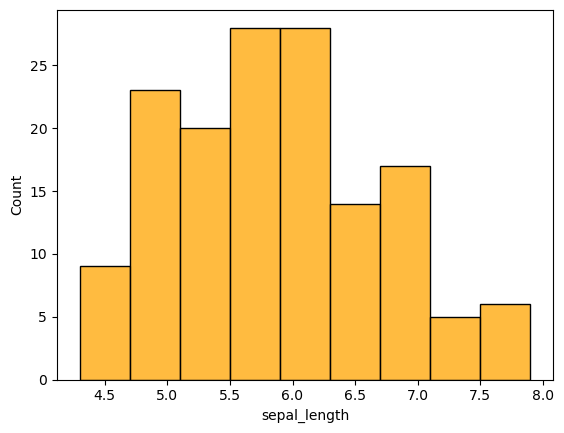

In [47]:

sns.histplot(data["sepal_length"],color="orange")


<Axes: xlabel='sepal_width', ylabel='Count'>

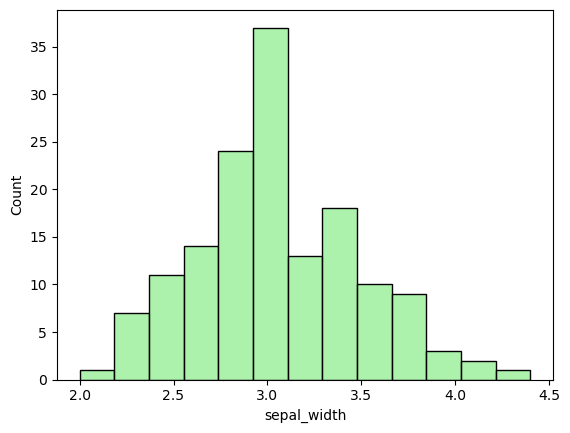

In [27]:
sns.histplot(data["sepal_width"],color="lightgreen")

<Axes: xlabel='petal_length'>

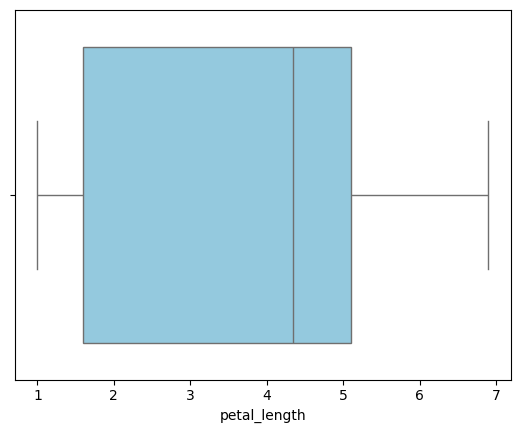

In [107]:
sns.boxplot(data["petal_length"],color="skyblue",orient ="y")

<Axes: xlabel='petal_width'>

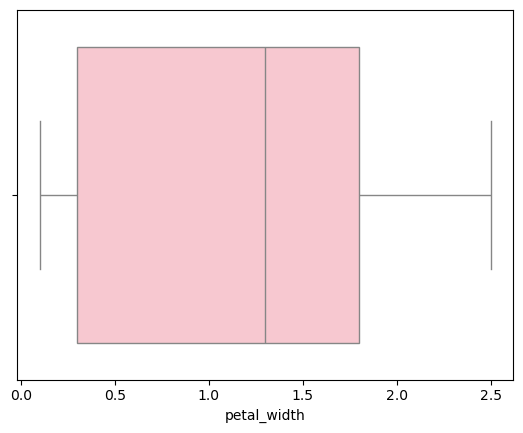

In [105]:
sns.boxplot(data["petal_width"],color="pink",orient = "y")

#### 2.  Imagine you are a data scientist at a company, and you want to analyze whether there is a significant difference in the generated by two sales teams. You collected the following data for their weekly sales revenue (in thousands of dollars) over the past few weeks:
#### (in thousands of dollars)Team A: 12, 15, 14, 10, 13, 11, 12, 14, 16, 13
#### (in thousands of dollars)Team B: 14, 17, 16, 15, 18, 16, 15, 17, 19, 16
### Hypothesis:
#### There is no significant difference in the average sales revenue between Team A and Team B.
#### There is a significant difference in the average sales revenue between Team A and Team B.
#### Perform an to test whether there is a significant difference in the sales revenue between Team A and Team B. Use a significance level of  0.5.

In [61]:
import numpy as np
from scipy import stats

TeamA = np.array([12, 15, 14, 10, 13, 11, 12, 14, 16, 13])
TeamB = np.array([14, 17, 16, 15, 18, 16, 15, 17, 19, 16])

# null hypothesis :There is no significant difference in the average sales revenue between Team A and Team B.
# Alternative hypothesis :There is a significant difference in the average sales revenue between Team A and Team B.

# performing t test independently:
t_statistic,p_value = stats.ttest_ind(TeamA,TeamB)
significance = 0.05 

#Decision:
if p_value <0.05:
    decision = "Reject null hypothesis"
else:
    decision = "accept null hypothesis"

#Conclusion :
if decision == "Reject null hypothesis":
     conclusion = "It is statistically evident that there is a significance difference in the average sales revenue between Team A and Team B."
else:
     conclusion = "There is insufficient evidence to claim  a significance difference in the average sales revenue between Team A and Team B."

#Display results:
print("T-statistic =",t_statistic)
print("p_value = ",p_value)
print("Decision = ",decision," at significance level 0.05")
print ("Conclusion : ",conclusion)



T-statistic = -4.422993810926827
p_value =  0.0003283390691027181
Decision =  Reject null hypothesis  at significance level 0.05
Conclusion :  It is statistically evident that there is a significance difference in the average sales revenue between Team A and Team B.


#### 3. You are a data analyst working for a retail company. The company wants to analyze whether the (Cash or Card) is associated with the . The company has observed the following data:Observed Frequency Table (Payment Method vs. Age Group)
#### There is no association between the payment method and the customer's age group. The two variables are independent.
#### There is an association between the payment method and the customer's age group. The two variables are dependent.
#### Perform a test whether there is an association between the payment method and the customer's age group.
p.

In [81]:
import pandas as pd
data = pd.read_csv(r"C:\Users\BIT LOGIC\Downloads\Untitled spreadsheet - Sheet1 (5).csv")
data.set_index("Age Group",inplace = True)
data

,Cash,Card
Age Group,,
Under 20,30,20
20-40,40,30
40-60,50,40
Over 60,20,30


In [87]:
# null hypothesis
H0 = "There is no association between the payment method and the customer's age group. The two variables are independent."
# Alternative hypothesis
H1 = "There is an association between the payment method and the customer's age group. The two variables are dependent."
# significance level =0.05

# Chi Square test :
chi2,p,dof,expected = stats.chi2_contingency(data)
print(f"Chi-Square Statistic :{chi2},P_value:{p}")

# Decision:
if p<0.05 :
    print("reject null hypothesis.\n",H1)
else:
    print("Failed to reject null.\n",H0)
    

Chi-Square Statistic :5.030990173847317,P_value:0.16954190566469166
Failed to reject null.
 There is no association between the payment method and the customer's age group. The two variables are independent.


#### From Chi square test,it is clear that there is no significant association between payment method and customer's age group .